In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Assuming the data is in a CSV file named "mobile_data.csv"
df = pd.read_csv("Mobiles_Dataset.csv")

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 76
Description             0
Link                    0
dtype: int64


In [23]:
df.drop_duplicates(inplace=True)

In [25]:
# Assuming 'Discount price' column contains numeric values or can be converted
# to numeric values (e.g., removing currency symbols or commas)
df['Discount price'] = pd.to_numeric(df['Discount price'], errors='coerce')

# Calculate mean and standard deviation
mean_price = df['Discount price'].mean()
std_price = df['Discount price'].std()

print(f"Mean Discount Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")


Mean Discount Price: nan
Standard Deviation: nan


In [26]:
top_rated = df.groupby('Product Name')['Stars'].mean().nlargest(5)
print(top_rated)


Product Name
SAMSUNG Galaxy Z Flip6 5G (Blue, 256 GB)             5.0
SAMSUNG Galaxy Z Flip6 5G (Silver Shadow, 256 GB)    5.0
IQOO Z9 Lite 5G (?Aqua Flow, 128 GB)                 4.7
vivo X100 Pro (Asteroid Black, 512 GB)               4.7
Apple iPhone 12 (Black, 256 GB)                      4.6
Name: Stars, dtype: float64


In [27]:
ram_stats = df['RAM (GB)'].describe()
storage_stats = df['Storage (GB)'].describe()
print("RAM Statistics:")
print(ram_stats)
print("\nStorage Statistics:")
print(storage_stats)


RAM Statistics:
count     984
unique     10
top         8
freq      382
Name: RAM (GB), dtype: object

Storage Statistics:
count     984
unique     12
top       128
freq      445
Name: Storage (GB), dtype: object


In [28]:
# Summary statistics
print(df.describe())


       Discount price       Stars  Display Size (inch)
count             0.0  984.000000           984.000000
mean              NaN    4.254980             6.043116
std               NaN    0.199734             1.581261
min               NaN    3.400000             0.660000
25%               NaN    4.200000             6.500000
50%               NaN    4.300000             6.670000
75%               NaN    4.400000             6.720000
max               NaN    5.000000             7.820000


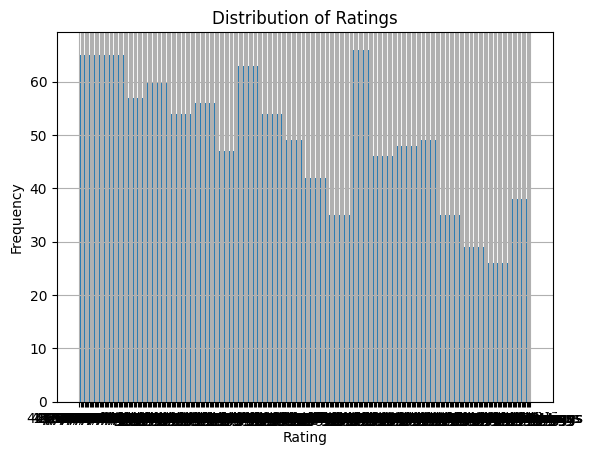

In [29]:
# Distribution of ratings:

import matplotlib.pyplot as plt
df['Rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


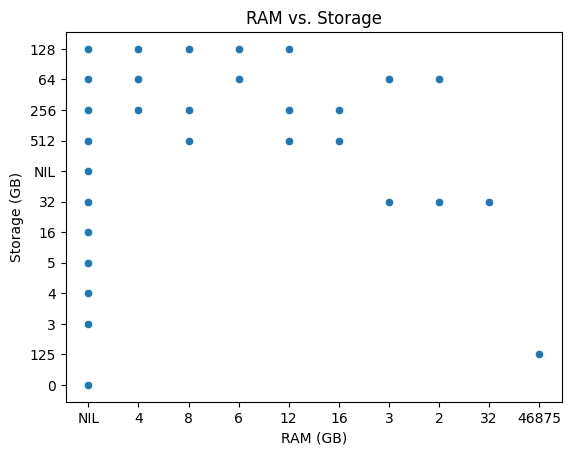

In [30]:
# Correlation between RAM and storage:

import seaborn as sns
sns.scatterplot(x='RAM (GB)', y='Storage (GB)', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Storage (GB)')
plt.title('RAM vs. Storage')
plt.show()


In [31]:
# Top 10 mobile phones by average star rating:

top_rated = df.groupby('Product Name')['Stars'].mean().nlargest(10)
print(top_rated)


Product Name
SAMSUNG Galaxy Z Flip6 5G (Blue, 256 GB)             5.0
SAMSUNG Galaxy Z Flip6 5G (Silver Shadow, 256 GB)    5.0
IQOO Z9 Lite 5G (?Aqua Flow, 128 GB)                 4.7
vivo X100 Pro (Asteroid Black, 512 GB)               4.7
Apple iPhone 12 (Black, 256 GB)                      4.6
Apple iPhone 12 (Black, 64 GB)                       4.6
Apple iPhone 12 (Blue, 128 GB)                       4.6
Apple iPhone 13 (Blue, 128 GB)                       4.6
Apple iPhone 13 (Blue, 256 GB)                       4.6
Apple iPhone 13 (Green, 128 GB)                      4.6
Name: Stars, dtype: float64


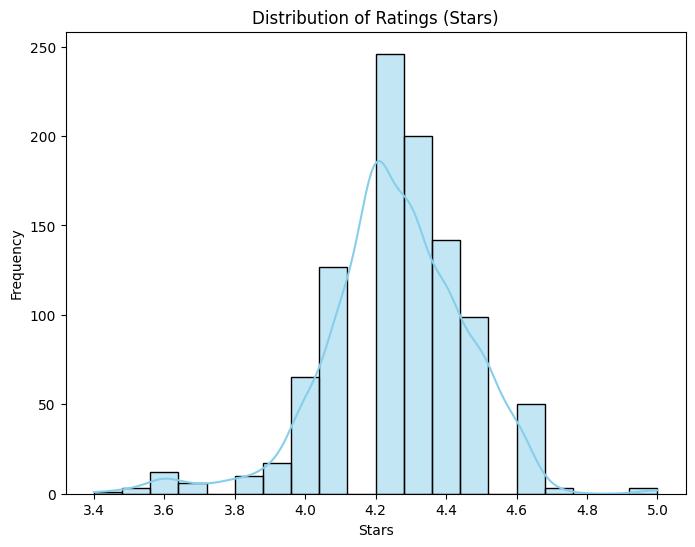

In [40]:
# Histogram for "Stars" column
plt.figure(figsize=(8, 6))
sns.histplot(df["Stars"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Ratings (Stars)")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'NIL'